# Examination of the Nelson Siegel Svensson Curve Type

The NSS Curve Type is a parametric equation designed for fitting interest rate term structures.

In [1]:
from financepy.market.curves.FinDiscountCurveNSS import FinDiscountCurveNSS

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  23 Sep 2020 at 00:02 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from financepy.finutils import *

In [5]:
curveDate = FinDate(1,1,2020)

In [6]:
tau1 = 2.0
tau2 = 0.5
times = np.linspace(0.01, 10.0, 50)
dates = curveDate.addYears(times)

We need to associate a day count and frequency with these rates - we do not automatically assume they the parametrisation is for a continuously compounded rate.

In [7]:
frequencyType = FinFrequencyTypes.ANNUAL
dayCountType = FinDayCountTypes.ACT_365F

In [8]:
curve1 = FinDiscountCurveNSS(curveDate, 1., 0., 0., 0., tau1, tau2, frequencyType, dayCountType)
factor1loading = curve1.zeroRate(dates)
curve2 = FinDiscountCurveNSS(curveDate, 0., 1., 0., 0., tau1, tau2, frequencyType, dayCountType)
factor2loading = curve2.zeroRate(dates)
curve3 = FinDiscountCurveNSS(curveDate, 0., 0., 1., 0., tau1, tau2, frequencyType, dayCountType)
factor3loading = curve3.zeroRate(dates)
curve4 = FinDiscountCurveNSS(curveDate, 0., 0., 0., 1., tau1, tau2, frequencyType, dayCountType)
factor4loading = curve4.zeroRate(dates)

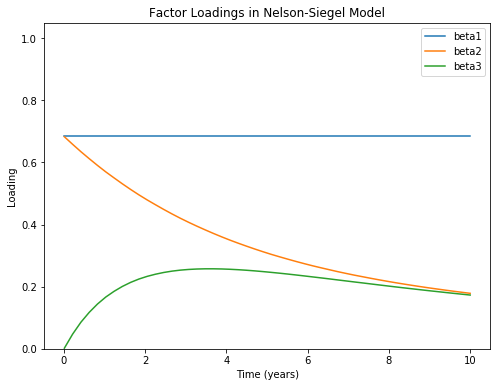

In [9]:
plt.figure(figsize = (8,6))
plt.plot(times,scale(factor1loading,1),label='beta1');
plt.plot(times,scale(factor2loading,1),label='beta2');
plt.plot(times,scale(factor3loading,1),label='beta3');
plt.ylim((0,1.05))

plt.title('Factor Loadings in Nelson-Siegel Model');
plt.xlabel('Time (years)');
plt.ylabel('Loading');
plt.legend(loc='best')

In [10]:
beta1 = 0.03
beta2 = -0.02
beta3 = -0.02
beta4 = 0.08
curve1 = FinDiscountCurveNSS(curveDate, beta1, beta2, beta3, beta4, tau1, tau2)
zeroRates1 = curve1.zeroRate(dates)

In [11]:
beta1 = 0.04
beta2 = -0.02
beta3 = -0.02
beta4 = 0.08
curve2 = FinDiscountCurveNSS(curveDate, beta1, beta2, beta3, beta4, tau1, tau2)
zeroRates2 = curve2.zeroRate(dates)

In [12]:
beta1 = 0.05
beta2 = -0.02
beta3 = -0.02
beta4 = 0.08
curve3 = FinDiscountCurveNSS(curveDate, beta1, beta2, beta3, beta4, tau1, tau2)
zeroRates3 = curve3.zeroRate(dates)

In [13]:
beta1 = 0.06
beta2 = -0.02
beta3 = -0.02
beta4 = 0.08
curve4 = FinDiscountCurveNSS(curveDate, beta1, beta2, beta3, beta4, tau1, tau2)
zeroRates4 = curve4.zeroRate(dates)

In [12]:
beta1 = 0.07
beta2 = -0.02
beta3 = -0.02
beta4 = 0.08
curve5 = FinDiscountCurveNSS(curveDate, beta1, beta2, beta3, beta4, tau1, tau2)
zeroRates5 = curve5.zeroRate(dates)

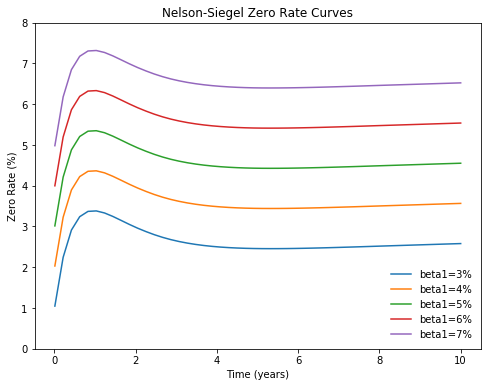

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(times, scale(zeroRates1, 100), label='beta1=3%')
plt.plot(times, scale(zeroRates2, 100), label='beta1=4%')
plt.plot(times, scale(zeroRates3, 100), label='beta1=5%')
plt.plot(times, scale(zeroRates4, 100), label='beta1=6%')
plt.plot(times, scale(zeroRates5, 100), label='beta1=7%')
plt.ylim((0, 8))

plt.title('Nelson-Siegel Zero Rate Curves')
plt.xlabel('Time (years)')
plt.ylabel('Zero Rate (%)')
plt.legend(loc='lower right', frameon=False)

In [14]:
maturityDate = curveDate.addYears(5.0)

In [15]:
curve1.df(maturityDate)

0.8827128550061853

In [16]:
curve1.zeroRate(maturityDate)

0.02458232980949878

In [17]:
curve1.fwdRate(maturityDate, "1M")

0.024065144169622472

In [18]:
curve1.fwd(maturityDate)

0.024309197641429626

Copyright (c) 2020 Dominic O'Kane